In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_histogram(data, num_bins):
    plt.hist(data, bins=num_bins, color='blue', alpha=0.7)
    plt.xlabel('z value')
    plt.ylabel('Frequency')
    plt.title('Sensor calibration errors, normalised by standard deviation')

# Load data from CSV file
def load_data_from_csv(file_path):
    data = pd.read_csv(file_path)
    return data

# where to save plots
overwrite = True
save_path = "/home/luke/Documents/thesis_plots/"

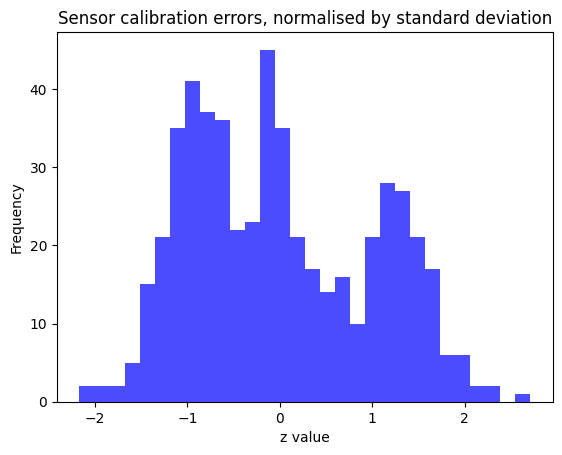

In [3]:
# Path to your CSV file (replace 'data.csv' with your file path)
csv_file_path = 'raw_sensor_calibrations.csv'

# Load data from CSV file
data = load_data_from_csv(csv_file_path)

# Extract the column of interest (replace 'column_name' with the name of the column you want to plot)
column_name = 'normalised'
data_to_plot = data[column_name]

# Number of bins (you can change this)
num_bins = 30

plot_histogram(data["normalised"], num_bins)
# plot_histogram(data["error / mN"], num_bins)

plt.gcf()
if False and overwrite: plt.savefig(save_path + "calibration_errors_distribution.png")
plt.show()

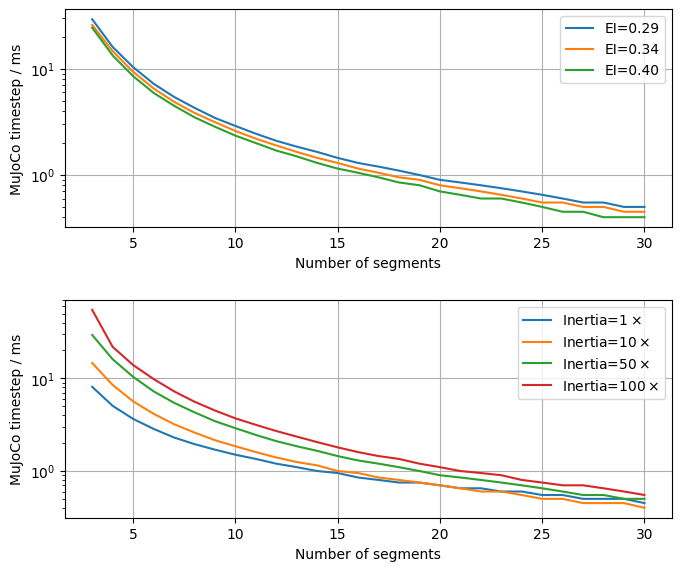

In [4]:
# Path to your CSV file (replace 'data.csv' with your file path)
csv_file_path = 'mujoco_timesteps.csv'

# Load data from CSV file
data = load_data_from_csv(csv_file_path)
segments = list(range(3, 31))

# Extract the column of interest (replace 'column_name' with the name of the column you want to plot)
column_names = [
  "t=0.9, w=28.0, inertia=1",
  "t=0.9, w=28.0, inertia=10",
  "t=0.9, w=28.0, inertia=50",
  "t=0.9, w=28.0, inertia=100",
  "t=1.0, w=24.0, inertia=1",
  "t=1.0, w=24.0, inertia=10",
  "t=1.0, w=24.0, inertia=50",
  "t=1.0, w=24.0, inertia=100",
  "t=1.0, w=28.0, inertia=1",
  "t=1.0, w=28.0, inertia=10",
  "t=1.0, w=28.0, inertia=50",
  "t=1.0, w=28.0, inertia=100",
]

data_indexes_to_plot = [
  [2, 6, 10],
  [0, 1, 2, 3],
]
legends = [
  ["EI=0.29", "EI=0.34", "EI=0.40"],
  [r"Inertia=$1\times$", r"Inertia=$10\times$", r"Inertia=$50\times$", r"Inertia=$100\times$"],
]

plot_relative = False

fig, axs = plt.subplots(2 + plot_relative, 1, sharex=False)

for i in range(len(data_indexes_to_plot)):
  for j in range(len(data_indexes_to_plot[i])):
    axs[i].plot(segments, data[column_names[data_indexes_to_plot[i][j]]])
  axs[i].legend(legends[i])
  axs[i].set_ylabel("MuJoCo timestep / ms")
  axs[i].set_xlabel("Number of segments")
  axs[i].set_yscale("log")
  axs[i].grid()

# now plot the relative change for the inertias
if len(axs) == 3:
  timesteps = [np.array(data[column_names[data_indexes_to_plot[1][j]]]) for j in range(len(data_indexes_to_plot[1]))]
  relative = np.array([np.divide(timesteps[i + 1], timesteps[0]) for i in range(len(data_indexes_to_plot[1]) - 1)])
  axs[2].plot(segments, [1 for i in range(len(segments))], "--")
  for i in range(len(relative)):
    axs[2].plot(np.array(segments), relative[i])
  axs[2].legend(legends[1][:])
  axs[2].grid()
  axs[2].set_ylim(ymin=0)
  axs[2].set_xlabel("Number of segments")
  axs[2].set_ylabel(r"Relative speed up vs $1\times$ inertia")
  Ns = 8
  print(f"Speed up factor at N = {Ns} is [{relative[0][Ns-3]:.2f}, {relative[1][Ns-3]:.2f}, {relative[2][Ns-3]:.2f}]") # -3 as N starts at 3

fig.tight_layout()
fig.set_size_inches(7, 3 * len(axs))
if False and overwrite: fig.savefig(save_path + "mujoco_timesteps.png")

[[7.945949141321592, 3.0710246718735306, 4.082405547467287], [9.095772740461799, 1.8471537162498641, 2.6395855706901576], [4.2532366351304995, 2.0508025439676585, 3.064636647085698]]
Average error is 4.22784080158312
Maximum error is 9.095772740461799


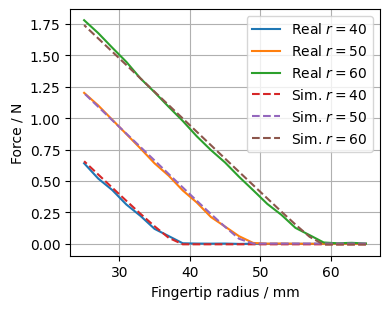

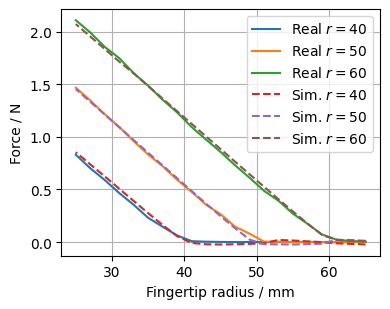

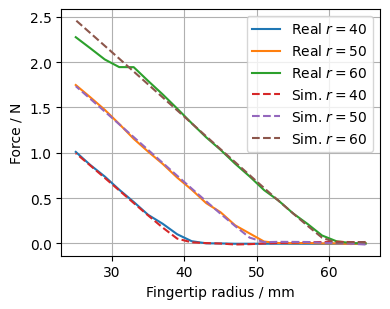

In [149]:
import sys
pathhere = "/home/luke/mujoco-devel/rl/"
sys.path.insert(0, pathhere)
from env.MjEnv import MjEnv
mjenv = MjEnv()

# Path to your CSV file (replace 'data.csv' with your file path)
csv_file_path = "sim_vs_real_forces_neat.csv"

# Load data from CSV file
data = load_data_from_csv(csv_file_path)
segments = list(range(3, 31))

stiffnesses = [
  "EI1", 
  "EI2", 
  "EI3"
]

eis = [r"$EI=0.29$Nm$^2$", r"$EI=0.34$Nm$^2$", r"$EI=0.40$Nm$^2$"]

subplot = False
if subplot:
  fig, axs = plt.subplots(1, len(stiffnesses))
else:
  fig = []
  axs = []
  for i in range(len(stiffnesses)):
    f, a = plt.subplots(1, 1)
    fig.append(f)
    axs.append(a)

# number of data points at the start to skip (130 -> 104mm)
skips = [16, 16, 16]

# number of datapoints to offset sim compared to real, +ve will fail due to [:offset]
offsets = [-2, -1, -1]

# Extract the column of interest (replace 'column_name' with the name of the column you want to plot)
column_names = [
  "XY pos", # 0 
  "Real 80", # 1 
  "Real 100", # 2 
  "Real 120", # 3 
  "Sim 70", # 4
  "Sim 80", # 5
  "Sim 90", # 6
  "Sim 100", # 7
  "Sim 110", # 8
  "Sim 120", # 9
]

data_indexes_to_plot = [
  [0],
  [1, 2, 3],
  [4, 6, 8]
]
legends = [r"Real $r=40$", r"Real $r=50$", r"Real $r=60$",
          r"Sim. $r=40$", r"Sim. $r=50$", r"Sim. $r=60$"]

# calculate error values
errors = [[0 for i in range(len(data_indexes_to_plot[1]))] for j in range(len(stiffnesses))]

for s, stiffness in enumerate(stiffnesses):

  data_np = [np.array(data[column_names[0]])]
  for i in range(1, len(column_names)):
    data_np.append(np.array(data[column_names[i] + " " + stiffness]))

  for i in range(len(data_indexes_to_plot[1])):
    x_real = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35
    y_real = data_np[data_indexes_to_plot[1][i]][skips[s] - 1:]
    axs[s].plot(x_real, y_real)

  for i in range(len(data_indexes_to_plot[1])):
    x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1 + offsets[s]:offsets[s]] - 35 + 2*offsets[s]
    y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1 + offsets[s]:offsets[s]]
    axs[s].plot(x_sim, y_sim, "--")
    
  for i in range(len(data_indexes_to_plot[1])):
    x_real = data_np[data_indexes_to_plot[0][0]][skips[s] - 1:] - 35
    y_real = data_np[data_indexes_to_plot[1][i]][skips[s] - 1:]
    x_sim = data_np[data_indexes_to_plot[0][0]][skips[s] - 1 + offsets[s]:offsets[s]] - 35 + 2*offsets[s]
    y_sim = data_np[data_indexes_to_plot[2][i]][skips[s] - 1 + offsets[s]:offsets[s]]
    count = 0
    area_error = False
    for j in range(len(x_real)):
      if y_real[j] > 0.15 * y_real[-1]:
        if area_error:
          sim_area = mjenv.mj.curve_area(x_sim[j:], y_sim[j:])
          real_area = mjenv.mj.curve_area(x_real[j:], y_real[j:])
          errors[s][i] = 100 * abs((real_area - sim_area) / real_area)
          # relative = True # gives % error
          # errors[s][i] = np.mean(np.abs(mjenv.mj.profile_error(
          #   x_sim[j:], y_sim[j:], x_real[j:], y_real[j:], relative
          # )))
          break
        else:
          errors[s][i] += 100 * (abs(y_sim[j] - y_real[j]) / y_real[j])
          count += 1
    if not area_error:
      errors[s][i] /= count
  
  # axs[s].set_title(f"Stiffness {eis[s]}")
  axs[s].set_ylabel("Force / N")
  axs[s].set_xlabel("Fingertip radius / mm")
  axs[s].grid()

  if subplot:
    if s == 0:
      axs[s].legend(legends)
  else:
    axs[s].legend(legends)
    fig[s].set_size_inches(5*0.8, 4*0.8)
    fig[s].tight_layout()
    if False and overwrite: fig[s].savefig(save_path + f"sim_vs_real_forces_{stiffness}.png")

if subplot:
  fig.set_size_inches(5 * ((2/3) * len(stiffnesses)), 3.5)
  fig.tight_layout()
  if False and overwrite: fig.savefig(save_path + "sim_vs_real_forces_subplot.png")

print(errors)
avg_error = np.average(errors)
print("Average error is", avg_error)
print("Maximum error is", np.max(errors))

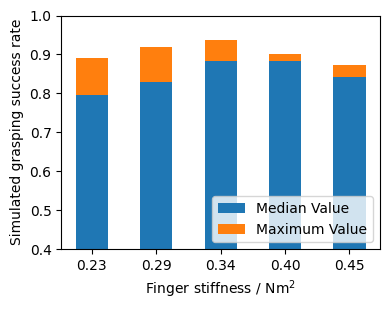

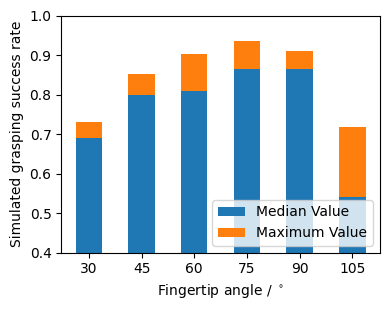

In [178]:
def plot_max_median(labels, medians, maxes, title=None):
  """
  Plot a stacked bar chart of median and max training performance
  """

  weight_counts = {
      "Median Value": np.array(medians),
      "Maximum Value": np.array(maxes) - np.array(medians),
  }
  width = 0.5

  fig, ax = plt.subplots()
  bottom = np.zeros(len(labels))

  for boolean, weight_count in weight_counts.items():
      p = ax.bar(labels, weight_count, width, label=boolean, bottom=bottom)
      bottom += weight_count

  if title is not None:
     ax.set_title("Number of penguins with above average body mass")
  ax.legend(loc="lower right")

  ax.set_ylabel("Simulated grasping success rate")
  ax.set_ylim(bottom=0.4, top=1.0)
  fig.set_size_inches(5*0.8, 4*0.8)
  fig.tight_layout()

  return fig, ax

angle_labels = ["30", "45", "60", "75", "90", "105"]
angle_medians = [
  0.691,
  0.799,
  0.808,
  0.865,
  0.864,
  0.542,
]
angle_maxes = [
  0.730,
  0.852,
  0.903,
  0.936,
  0.910,
  0.719,
]
stiffness_labels = ["0.23", "0.29", "0.34", "0.40", "0.45"]
stiffness_medians = [
  0.796,
  0.830,
  0.882,
  0.882,
  0.841,
]
stiffness_maxes = [
  0.890,
  0.918,
  0.936,
  0.900,
  0.872,
]

fig1, ax1 = plot_max_median(stiffness_labels, stiffness_medians, stiffness_maxes)
fig2, ax2 = plot_max_median(angle_labels, angle_medians, angle_maxes)

ax1.set_xlabel(r"Finger stiffness / Nm$^2$")
ax2.set_xlabel(r"Fingertip angle / $^\circ$")
fig1.tight_layout()
fig2.tight_layout()

if False and overwrite: 
  fig1.savefig(save_path + "stiffness_pilot.png")
  fig2.savefig(save_path + "angle_pilot.png")